In [1]:
%matplotlib inline
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import hamming_loss
import matplotlib.pyplot as plt

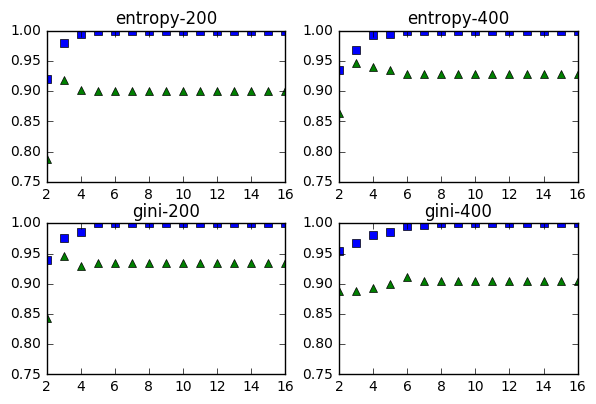

In [2]:
data=['200', '400']
criterion=['entropy','gini']
depth_vec=np.linspace(2,16,15)



fig, axes = plt.subplots(2, 2)
fig.tight_layout()
j=1
for c in criterion:
    for d in data:
        X_trn = np.genfromtxt('X-trn-'+d+'.csv', delimiter=',')
        y_trn = np.genfromtxt('Y-trn-'+d+'.csv', delimiter=',')
        X_tst = np.genfromtxt('X-tst-'+d+'.csv', delimiter=',')
        y_tst = np.genfromtxt('Y-tst-'+d+'.csv', delimiter=',')
        tst=[]
        trn=[]
        
        for i in depth_vec:
            clf = tree.DecisionTreeClassifier(c, max_depth=i, random_state=0)
            clf = clf.fit(X_trn, y_trn)
            y_pred = clf.predict(X_tst)
            y_predt = clf.predict(X_trn)
            tst.append(1-hamming_loss(y_tst, y_pred))
            trn.append(1-hamming_loss(y_trn, y_predt))
        
        plt.subplot(2,2,j) 
        plt.plot(depth_vec, tst,'g^', depth_vec, trn,'bs');
        plt.axis([2, 16, 0.75, 1])
        plt.title(c+'-'+d);
        j+=1

        